# Orders

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
order_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/orders.csv/orders.csv')

In [ ]:
order_df.head(30)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
order_df.tail(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421068,803273,206208,test,50,5,11,4.0
3421069,3154581,206209,prior,1,3,11,NaN
3421070,1889163,206209,prior,2,3,17,7.0
3421071,1542354,206209,prior,3,5,11,30.0
3421072,688306,206209,prior,4,1,10,30.0
3421073,2307371,206209,prior,5,4,15,3.0
3421074,3186442,206209,prior,6,0,16,3.0
3421075,550836,206209,prior,7,2,13,9.0
3421076,2129269,206209,prior,8,3,17,22.0
3421077,2558525,206209,prior,9,4,15,22.0


In [ ]:
order_prior_df = order_df[order_df['eval_set']=='prior']
order_prior_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0


In [ ]:
order_prior_df.shape
# 약 321만 개의 row, column은 7개이다

(3214874, 7)

In [ ]:
order_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214874 entries, 0 to 3421081
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 196.2+ MB


@ eval_set만 object 타입, 나중에 숫자로 변환하는 게 좋지 않을까? (ex. 0, 1, 2)

- order_id: order identifier
- user_id: customer identifier
- eval_set: which evaluation set this order belongs in - (see SET described below)
- order_number: the order sequence number for this user (1 = first, n = nth)
- order_dow: the day of the week the order was placed on
- order_hour_of_day: the hour of the day the order was placed on
- days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)

- order_id : 주문 번호
- user_id : 고객 식별번호
- eval_set :  주문이 어떤 set에 속하는지(prior, train, test)
- order_number : 주문번호, 한 유저가 연속으로 몇개를 주문했는지 보여준다
- order_dow : 주문이 발생된 요일
- order_hour_of_day : 주문이 발생된 시간
- days_since_prior : 마지막 주문으로부터 얼마나 지났는지(최대 한도는 30일)

@ order_dow : 요일이 숫자로 되어 있는데, 어떤 요일이 어떤 숫자인지 파악이 필요하다

@ user_id가 달라도 각각의 제품에 따라 기록이 따로 되고 있으므로, 
- 각 고객의 구매 성향
- 충성 고객의 수 파악(구매 갯수에 따라 - order_number)
- 요일 별/ 시간 별 주문 통계
- 어떤 고객이 / 어떤 제품을 얼마나 자주 구매하는가? (days_since_prior)
등을 살펴볼 수 있을 것으로 기대된다

In [ ]:
user_count = order_prior_df['user_id'].value_counts()
user_count
# 고객 한 사람당 최대 99건, 최소 3건의 주문을 했음을 확인
# 총 고객 숫자는 206209명

152340    99
185641    99
185524    99
81678     99
70922     99
          ..
13046      3
70208      3
111440     3
31762      3
47980      3
Name: user_id, Length: 206209, dtype: int64

In [ ]:
user_count_df = pd.DataFrame([user_count])
user_count_df = user_count_df.T    # user_count_df.transpose()를 써도 같다
user_count_df

,user_id
152340,99
185641,99
185524,99
81678,99
70922,99
...,...
13046,3
70208,3
111440,3
31762,3


In [ ]:
# 구매 건수 별 구매 고객 수 확인
user_count_df.value_counts()
# 왜 98건까지만 나올까??

user_id
3          23986
4          19590
5          16165
6          13850
7          11700
           ...  
93            57
90            56
96            54
97            50
98            47
Length: 97, dtype: int64

In [ ]:
user_count_df[user_count_df['user_id']==99].value_counts()

user_id
99         1374
dtype: int64

In [ ]:
user_count.describe()

count    206209.000000
mean         15.590367
std          16.654774
min           3.000000
25%           5.000000
50%           9.000000
75%          19.000000
max          99.000000
Name: user_id, dtype: float64

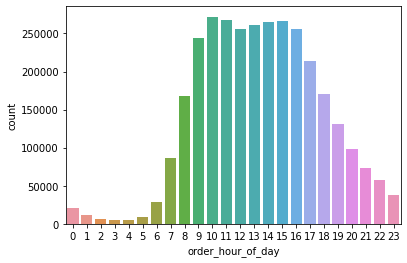

In [ ]:
# 어느 시간대에 구매가 많이 이루어졌는지 확인
sns.countplot(data=order_prior_df, x='order_hour_of_day')
# 오전 7시부터 급격히 상승하여 오전 10시에 peak, 낮 12시에 약간 감소하다가 다시 상승하고, 16시 경부터 급격히 하락하기 시작
# 9 ~ 16시 사이에 가장 많은 구매가 이루어진다는 것을 알 수 있다
# 온라인 쇼핑의 특징일 수 있음

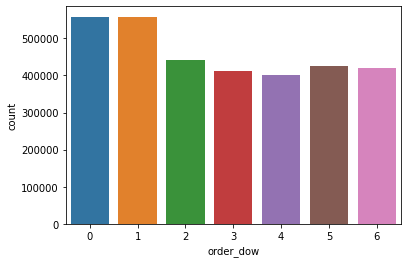

In [ ]:
# 어느 요일에 구매가 많이 이루어졌는지를 확인
sns.countplot(data=order_prior_df, x='order_dow')
# 0과 1, 즉 일 & 월에 구매가 가장 많다. (+ 희성님 참고자료 첨부: 온라인 쇼핑 특징)

In [ ]:
# 시간&요일별 pivot table 만들기
hod_dow_pt = pd.pivot_table(order_prior_df, values='order_number', aggfunc='count', index=['order_dow'], columns=['order_hour_of_day'])
hod_dow_pt

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3692,2235,1299,888,750,1076,3138,11530,26223,37990,...,50484,50020,45930,36874,27347,20972,16984,13425,10440,6393
1,3475,1735,1063,711,761,1523,5101,15792,32563,49533,...,44220,43913,42200,34610,27293,20926,15422,11292,8458,5322
2,2906,1485,892,679,700,1330,4524,12550,23488,34499,...,35102,35408,35482,30216,24886,18922,14223,10071,7671,5079
3,2767,1407,889,605,666,1265,4314,11739,21305,30653,...,32863,33909,33284,28619,23536,18105,13064,9718,7732,4895
4,2476,1414,837,640,694,1251,4135,11823,20597,29645,...,31665,32095,32175,27577,22872,18194,13351,10169,8274,5308
5,2989,1539,953,796,857,1466,4573,12590,22623,32258,...,35131,35218,33700,28086,22700,17513,12557,8956,7006,4953
6,3067,1781,1137,801,747,1061,3007,10632,21522,28918,...,36091,35569,33178,28098,22364,16988,12508,9805,7959,5663


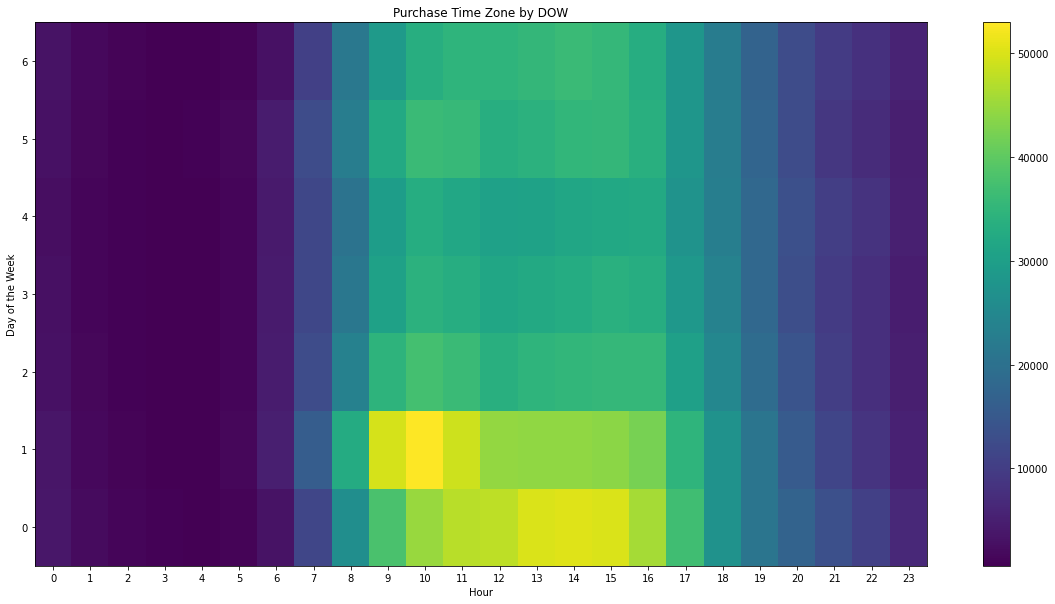

In [ ]:
# 시간&요일별 히트맵 그리기
# 참고: https://noodle.tistory.com/15
plt.figure(figsize=(20,10))
plt.pcolor(hod_dow_pt)
plt.xticks(np.arange(0.5,len(hod_dow_pt.columns),1),hod_dow_pt.columns)
plt.yticks(np.arange(0.5,len(hod_dow_pt.index),1),hod_dow_pt.index)
plt.title('요일별 종료 시간 히트맵')
plt.title('Purchase Time Zone by DOW')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.colorbar()
plt.show()

# 일요일 낮(13-15) & 월요일 오전(9-11)에 구매량이 높은 편임을 알 수 있다
# 금-토 여가를 즐긴 후, 가정에서 휴식을 취할 때 / 월요일 아침 출근 후 구매가 많이 발생한다고 유추할 수 있다

--- 

# Aisles

In [ ]:
aisles_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/aisles.csv/aisles.csv')

In [ ]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
aisles_df.tail()

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [ ]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
aisles_df.shape

(134, 2)

---

# Products

In [ ]:
products_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/products.csv/products.csv')

In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
products_df.tail()

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
products_df.shape

(49688, 4)

- product_id: product identifier
- product_name: name of the product
- aisle_id: foreign key
- department_id: foreign key

- product_id : 상품 식별자
- product_name : 상품명
- aisle_id : 외래키
- department_id : 외래키

---

# Departments

In [ ]:
dep_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/departments.csv/departments.csv')

In [ ]:
dep_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
dep_df.tail()

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [ ]:
dep_df.shape

(21, 2)

In [ ]:
dep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


- department_id: department identifier
- department: the name of the department

- department_id: 대분류 식별자
- department: 대분류 명

---

# Order_products_prior

In [ ]:
opp_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/order_products__prior.csv/order_products__prior.csv')

In [ ]:
opp_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
opp_df.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [ ]:
opp_df.shape

(32434489, 4)

In [ ]:
# 재구매비율이 얼마나 되는지 확인
opp_df_reorder = pd.DataFrame(opp_df['reordered'])
opp_df_reorder

,reordered
0,1
1,1
2,0
3,1
4,0
...,...
32434484,1
32434485,0
32434486,0
32434487,1


In [ ]:
opp_df_reorder.value_counts()
# 재구매: 19,126,536건
# 첫 구매: 13,307,953건

reordered
1            19126536
0            13307953
dtype: int64

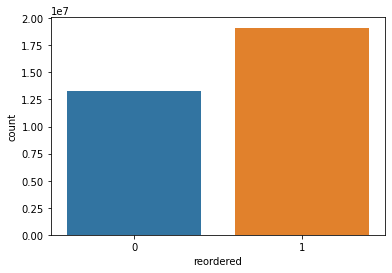

In [ ]:
sns.countplot(data=opp_df_reorder, x='reordered')
# 재구매가 첫 구매에 비해서 높다
# 기존 구매 고객층(특히 vip)을 굳건히 할 필요성의 근거

In [ ]:
opp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


- order_id: foreign key
- product_id: foreign key
- add_to_cart_order: order in which each product was added to cart
- reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

- order_id: 외래 키
- product_id: 외래 키
- add_to_cart_order: 각 상품이 카트에 들어간 주문
- reordered: 과거 주문 이력이 있으면 1, 아니면 0

---

# Order_products_train

In [ ]:
opt_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/order_products__train.csv/order_products__train.csv')

In [ ]:
opt_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
opt_df.tail()

,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [ ]:
opt_df.shape

(1384617, 4)

In [ ]:
opt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


- order_id: foreign key
- product_id: foreign key
- add_to_cart_order: order in which each product was added to cart
- reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

- order_id: 외래 키
- product_id: 외래 키
- add_to_cart_order: 각 상품이 카트에 들어간 주문
- reordered: 과거 주문 이력이 있으면 1, 아니면 0

@ 과거 주문 이력이 없으면서 + 카트에 담아두기를 한 사람 >> 새로운 고객층으로 만들기 위한 목표설정도 가능할 것으로 보인다

# Merge

우리 회사(Instacart)는 다양한 마켓을 연결하여 고객에게 상품을 제공하는 온라인 쇼핑몰이다. <br>
우리 회사는 직접 상품을 판매하는 회사가 아니므로, 거래 시 발생하는 수수료를 통해 매출을 증대해야 한다. <br>
따라서 한 번에 많은 양을 구입하는 고객보다는, 적게 구매하더라도 자주 구매하는 고객들이 우리의 VIP 고객들이다. <br>
VIP 고객들의 구매패턴을 파악하기 위해 VIP 고객에 대한 분석을 먼저 시작하였다.
<br>
<br>
자주 산다: order number 숫자가 높다
이를 확인하기 위해서 boxplot으로 확인해보았다

In [ ]:
# merging products and aisles df based on product id
temp1 = pd.merge(left=products_df, right=aisles_df, how='left')
# merging products and departments df based on product id
temp1 = pd.merge(left=temp1, right=dep_df, how='left')
temp1

# 시각화 하기 (소분류 별, 대분류별, 프로덕트)
# 대분류는 히스토그램
# 소분류는 히스토그램 탑 10 또는 라인그래프 ...

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [ ]:
# merging order prior and temp1 based on prior
temp2 = pd.merge(left=opp_df, right=temp1, how='left')
# merging order prior and orders df based on prior
temp2 = pd.merge(left=temp2, right=order_df, how='left')
temp2

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,prior,24,2,6,21.0
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,prior,24,2,6,21.0
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,prior,24,2,6,21.0
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,prior,24,2,6,21.0


In [ ]:
# user_id, order_id, department_n, aisles_n, product_n, prod_name, add to cart, reordered< - temp 3
# 지울 열: eval_set, aisle_id, department_id
temp3 = temp2[['user_id', 'order_id', 'department', 'aisle', 'product_name', 'order_number', 'add_to_cart_order', 'reordered']]
temp3

,user_id,order_id,department,aisle,product_name,order_number,add_to_cart_order,reordered
0,202279,2,dairy eggs,eggs,Organic Egg Whites,3,1,1
1,202279,2,produce,fresh vegetables,Michigan Organic Kale,3,2,1
2,202279,2,pantry,spices seasonings,Garlic Powder,3,3,0
3,202279,2,pantry,oils vinegars,Coconut Butter,3,4,1
4,202279,2,pantry,baking ingredients,Natural Sweetener,3,5,0
...,...,...,...,...,...,...,...,...
32434484,25247,3421083,household,dish detergents,Free & Clear Natural Dishwasher Detergent,24,6,1
32434485,25247,3421083,snacks,crackers,Organic Mini Sandwich Crackers Peanut Butter,24,7,0
32434486,25247,3421083,frozen,frozen breakfast,All Natural French Toast Sticks,24,8,0
32434487,25247,3421083,produce,fresh fruits,Banana,24,9,1


In [ ]:
# VIP를 가려내기 위해 user_id별로 오더 건수를 세봤다
temp3.groupby('user_id').count()['order_id']

user_id
1          59
2         195
3          88
4          18
5          37
         ... 
206205     32
206206    285
206207    223
206208    677
206209    129
Name: order_id, Length: 206209, dtype: int64

In [ ]:
# 예를 들어서 유저 4에 오더건수가 18건이라서 한번에 보고 싶어서 확인했다.
temp3[temp3['user_id']==4]

,user_id,order_id,department,aisle,product_name,order_number,add_to_cart_order,reordered
897542,4,94891,alcohol,specialty wines champagnes,Extra-Dry Cava,4,1,0
897543,4,94891,beverages,refrigerated,Original Orange Juice,4,2,0
6547608,4,691089,canned goods,soup broth bouillon,Vegetable Classics Vegetable Soup,3,1,0
6547609,4,691089,beverages,soft drinks,Diet Caffeine Free Naturally Flavored Lemon Li...,3,2,0
6547610,4,691089,bakery,tortillas flat bread,Low Carb Whole Wheat Tortillas,3,3,0
6547611,4,691089,produce,fresh fruits,Organic Gala Apples,3,4,0
6547612,4,691089,frozen,frozen meals,Light & Lean Spaghetti Italiano with Meatless ...,3,5,0
6547613,4,691089,frozen,frozen meals,Enchilada Black Bean Vegetable,3,6,1
6547614,4,691089,produce,fresh fruits,Organic Large Extra Fancy Fuji Apple,3,7,0
19249953,4,2030307,alcohol,red wines,Private Selection Pinot Noir,2,1,0


In [ ]:
# 고객별로 주문한 횟수 order_number로 확인가능
# 조금 더 간단하게 VIP확인을 위해 prior df말고 더 작은 orders df을 사용했다.
# 필터링 조건이 prior data 그리고 user_id별 카운트
order_number_count = order_df[order_df['eval_set']=='prior'].groupby(['user_id']).count()
order_number_count

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,10,10,10,10,10,9
2,14,14,14,14,14,13
3,12,12,12,12,12,11
4,5,5,5,5,5,4
5,4,4,4,4,4,3
...,...,...,...,...,...,...
206205,3,3,3,3,3,2
206206,67,67,67,67,67,66
206207,16,16,16,16,16,15


In [ ]:
# 통계치 숫자로 확인
order_number_count.describe()
# 시각화: 통계치 그래프 그리기
# 정규분포화된 곡선 그래프 kde

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000
mean,15.590367,15.590367,15.590367,15.590367,15.590367,14.590367
std,16.654774,16.654774,16.654774,16.654774,16.654774,16.654774
min,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
50%,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000
75%,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,98.000000


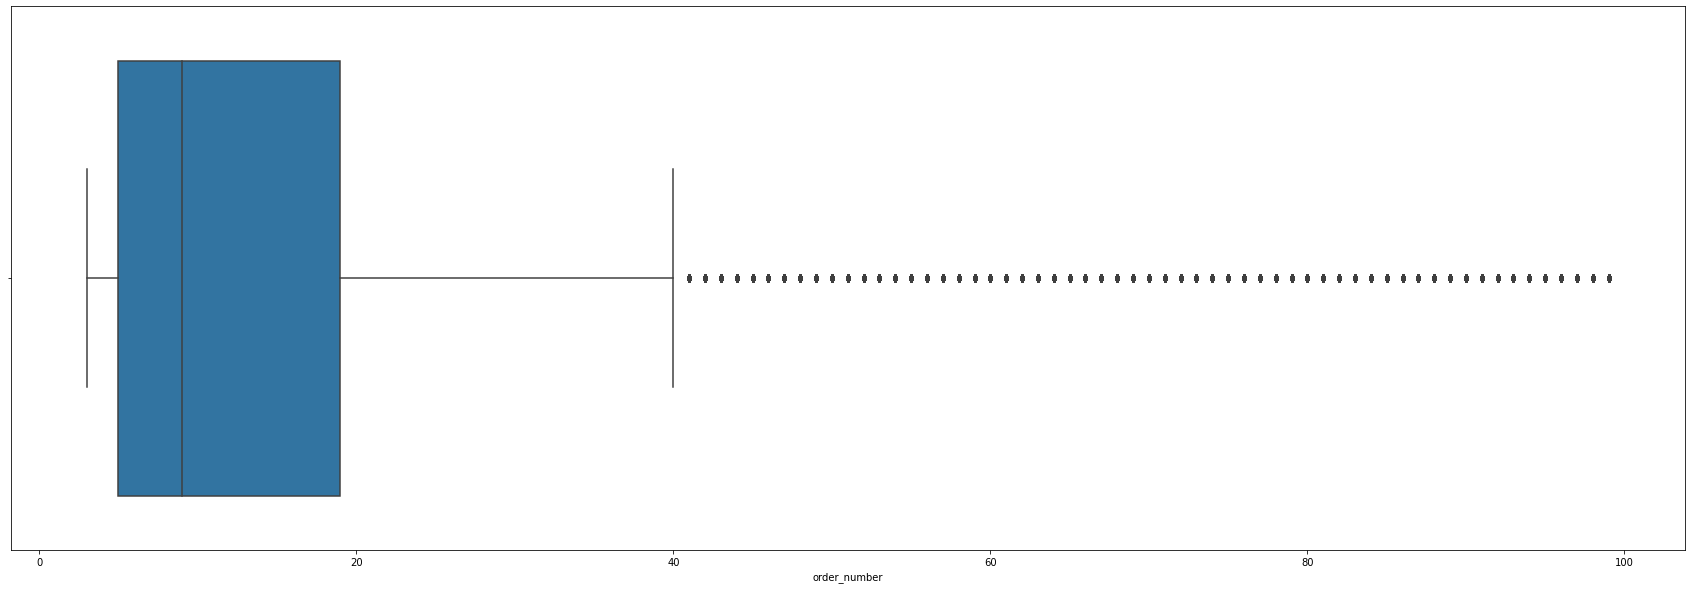

In [ ]:
# 박스플롯으로 백분위수를 시각화함과 동시에 이상치를 확인하려고 그렸다.
# 여기서 order_number 40 이상이 이상치로 발견
# 그래서 이상치가 몇명인지 궁금해서 확인해보기로 했다.
plt.figure(figsize=(30,10))
sns.boxplot(data=order_number_count, x='order_number')

In [ ]:
order_number_count['order_number'].describe()

count    206209.000000
mean         15.590367
std          16.654774
min           3.000000
25%           5.000000
50%           9.000000
75%          19.000000
max          99.000000
Name: order_number, dtype: float64

In [ ]:
# 가설: order_number가 40 인 이상을 확인
order_number_vip = order_number_count[order_number_count['order_number'] >= 40]
order_number_vip

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
17,40,40,40,40,40,39
27,81,81,81,81,81,80
50,67,67,67,67,67,66
54,77,77,77,77,77,76
90,71,71,71,71,71,70
...,...,...,...,...,...,...
206158,50,50,50,50,50,49
206174,52,52,52,52,52,51
206193,41,41,41,41,41,40


In [ ]:
order_number_normal = order_number_count[order_number_count['order_number'] < 40]
order_number_normal

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,10,10,10,10,10,9
2,14,14,14,14,14,13
3,12,12,12,12,12,11
4,5,5,5,5,5,4
5,4,4,4,4,4,3
...,...,...,...,...,...,...
206203,5,5,5,5,5,4
206204,4,4,4,4,4,3
206205,3,3,3,3,3,2


In [ ]:
# order df 전체 고객수 대비 대략 8.68% 가 40번 이상 구매한 고객이었다
17902/206209

0.08681483349417339

In [ ]:
# 이 가설을 prior에 적용시켜보았다 
# 40번 이상 구매한 고객들의 구매한 제품 건수
temp4 = temp3[temp3['order_number'] >=40]
temp4

,user_id,order_id,department,aisle,product_name,order_number,add_to_cart_order,reordered
30,156122,5,produce,fresh fruits,Bag of Organic Bananas,42,1,1
31,156122,5,pantry,salad dressing toppings,"Just Crisp, Parmesan",42,2,1
32,156122,5,deli,prepared soups salads,Fresh Fruit Salad,42,3,1
33,156122,5,produce,packaged vegetables fruits,Organic Raspberries,42,4,1
34,156122,5,dairy eggs,milk,2% Reduced Fat Milk,42,5,1
...,...,...,...,...,...,...,...,...
32434398,119835,3421069,produce,fresh fruits,Organic Strawberries,75,8,1
32434399,119835,3421069,produce,fresh vegetables,Organic Cucumber,75,9,1
32434400,119835,3421069,produce,fresh vegetables,Organic Red Potato,75,10,1
32434401,119835,3421069,produce,fresh vegetables,Organic Large Green Asparagus,75,11,1


In [ ]:
temp3[temp3['user_id']==156122]

,user_id,order_id,department,aisle,product_name,order_number,add_to_cart_order,reordered
30,156122,5,produce,fresh fruits,Bag of Organic Bananas,42,1,1
31,156122,5,pantry,salad dressing toppings,"Just Crisp, Parmesan",42,2,1
32,156122,5,deli,prepared soups salads,Fresh Fruit Salad,42,3,1
33,156122,5,produce,packaged vegetables fruits,Organic Raspberries,42,4,1
34,156122,5,dairy eggs,milk,2% Reduced Fat Milk,42,5,1
...,...,...,...,...,...,...,...,...
32102348,156122,3386168,snacks,cookies cakes,Biscuits Orange Pim's,19,3,1
32102349,156122,3386168,snacks,nuts seeds dried fruit,No Salt Roasted Pistachios,19,4,1
32102350,156122,3386168,household,paper goods,Sensitive Toilet Paper,19,5,1
32102351,156122,3386168,household,dish detergents,Classic Scent Liquid Dish Soap,19,6,1


In [ ]:
#temp4[temp4['user_id']==156122]

In [ ]:
# VIP고객이 제품을 많이 구매했다
# 대략 32.8%의 제품을 오더했다
10661601/32454490

0.3285092756040844

In [ ]:
# VIP = 40번 이상 구매한 고객수, 수수료로 설명가능 = 대략 27.21%
# 일반고객 = 40번 미만 구매한 고객수 대략 100-27.21 = 

# 해야 할 일: 정리 코랩 하고 내용

In [ ]:
order_number_vip.describe()

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,17902.000000,17902.000000,17902.000000,17902.000000,17902.000000,17902.000000
mean,59.209641,59.209641,59.209641,59.209641,59.209641,58.209641
std,17.690520,17.690520,17.690520,17.690520,17.690520,17.690520
min,40.000000,40.000000,40.000000,40.000000,40.000000,39.000000
25%,45.000000,45.000000,45.000000,45.000000,45.000000,44.000000
50%,53.000000,53.000000,53.000000,53.000000,53.000000,52.000000
75%,68.000000,68.000000,68.000000,68.000000,68.000000,67.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,98.000000


In [ ]:
order_number_normal = order_number_count[order_number_count['order_number'] < 40]
order_number_normal

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,10,10,10,10,10,9
2,14,14,14,14,14,13
3,12,12,12,12,12,11
4,5,5,5,5,5,4
5,4,4,4,4,4,3
...,...,...,...,...,...,...
206203,5,5,5,5,5,4
206204,4,4,4,4,4,3
206205,3,3,3,3,3,2


In [ ]:
len(order_number_normal)/len(order_number_count)

0.9131851665058266

In [ ]:
order_number_normal.describe()

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,188307.000000,188307.000000,188307.000000,188307.000000,188307.000000,188307.000000
mean,11.443563,11.443563,11.443563,11.443563,11.443563,10.443563
std,8.713417,8.713417,8.713417,8.713417,8.713417,8.713417
min,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000
75%,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000
max,39.000000,39.000000,39.000000,39.000000,39.000000,38.000000


In [ ]:
# VIP vs normal pie graph or histrogram 고객 숫자 그래프


In [ ]:
# 통계 그래프 VIP vs normal

3169313.2900000005
6443159.970000002
0.3297084115893811


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


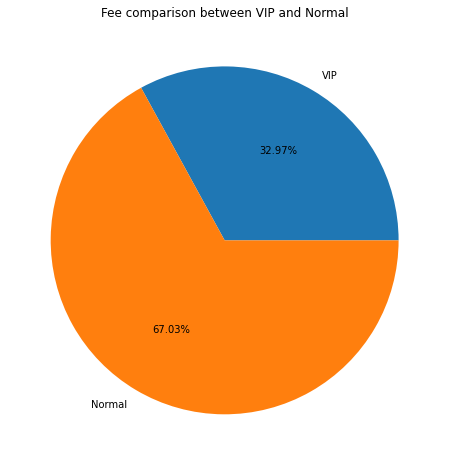

In [ ]:
# 가설확인: 전체 수수료 대비 VIP가 차지하는 비율: 대략 8%의 고객이 32%의 매출(order_number * fee)을 올렸다
# 시각화 pie graph 필요
fee = 2.99
vip_fee = fee * order_number_vip['order_number'].mean() * len(order_number_vip)
normal_fee = fee * order_number_normal['order_number'].mean() * (len(order_number_count)-len(order_number_vip))
total_fee = vip_fee + normal_fee
print(vip_fee)
print(normal_fee)
print(vip_fee / total_fee)

fee_df = pd.DataFrame([vip_fee, normal_fee], index=['VIP', 'Normal'])
fee_df
plt.figure(figsize=(8, 8))
plt.pie(fee_df, labels=fee_df.index, autopct='%.2f%%')
plt.title('Fee comparison between VIP and Normal')
plt.show()

In [ ]:
# 해야 할 일: VIP 품목 구매 패턴 분석 (소분류, 대분류)
# 해야 할 일: 예측 분석 (가설)
# 해야 할 일: 모델 정하기 ()
# 해야 할 일: 

In [ ]:
order_number_vip.info()
order_number_vip

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17902 entries, 17 to 206208
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   order_id                17902 non-null  int64
 1   eval_set                17902 non-null  int64
 2   order_number            17902 non-null  int64
 3   order_dow               17902 non-null  int64
 4   order_hour_of_day       17902 non-null  int64
 5   days_since_prior_order  17902 non-null  int64
dtypes: int64(6)
memory usage: 979.0 KB


,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
17,40,40,40,40,40,39
27,81,81,81,81,81,80
50,67,67,67,67,67,66
54,77,77,77,77,77,76
90,71,71,71,71,71,70
...,...,...,...,...,...,...
206158,50,50,50,50,50,49
206174,52,52,52,52,52,51
206193,41,41,41,41,41,40


In [ ]:
order_number_vip2 = order_number_vip.reset_index()
order_number_vip2 = order_number_vip2['user_id']
order_number_vip2

0            17
1            27
2            50
3            54
4            90
          ...  
17897    206158
17898    206174
17899    206193
17900    206206
17901    206208
Name: user_id, Length: 17902, dtype: int64

In [ ]:
vip_df = pd.merge(left=order_number_vip2, right=temp2, how='left')
vip_df

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,17,343199,7350,1,1,Natural Lime Flavor Sparkling Mineral Water,115,7,water seltzer sparkling water,beverages,prior,26,5,17,5.0
1,17,343199,18534,2,1,Grade A Extra Large Eggs,86,16,eggs,dairy eggs,prior,26,5,17,5.0
2,17,343199,17762,3,1,Light Oaked Chardonnay,62,5,white wines,alcohol,prior,26,5,17,5.0
3,17,343199,48544,4,1,Compleats Chicken Breast Gravy Mashed Potatoes...,4,9,instant foods,dry goods pasta,prior,26,5,17,5.0
4,17,343199,4591,5,0,Quick 1 Minute Oatmeal,130,14,hot cereal pancake mixes,breakfast,prior,26,5,17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10661596,206208,3412250,14467,8,1,Sweet Baguette,112,3,bread,bakery,prior,29,4,18,4.0
10661597,206208,3412250,23644,9,1,Sharp Cheddar Thick Slices Cheese,21,16,packaged cheese,dairy eggs,prior,29,4,18,4.0
10661598,206208,3412250,21461,10,0,Triple Creme Goat Brie,21,16,packaged cheese,dairy eggs,prior,29,4,18,4.0
10661599,206208,3412250,31506,11,1,Extra Virgin Olive Oil,19,13,oils vinegars,pantry,prior,29,4,18,4.0


In [ ]:
vip_df[vip_df['user_id'] == 27]

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
294,27,7099,6799,1,0,Revive Zero Vitamin Water,64,7,energy sports drinks,beverages,prior,63,3,10,1.0
295,27,7099,8580,2,0,VitaminWater Zero™ XXX Acai Blueberry Pomegranate,64,7,energy sports drinks,beverages,prior,63,3,10,1.0
296,27,7099,31231,3,0,Vitamin Water Zero Rise Orange,64,7,energy sports drinks,beverages,prior,63,3,10,1.0
297,27,7099,1185,4,0,Energy Tropical Citrus Vitamin Water Drink,64,7,energy sports drinks,beverages,prior,63,3,10,1.0
298,27,7099,44051,5,0,Zero Vitamin Water,64,7,energy sports drinks,beverages,prior,63,3,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,27,3374715,42828,10,0,Whipped Cream Cheese,108,16,other creams cheeses,dairy eggs,prior,40,4,10,3.0
1058,27,3374715,4781,11,1,Original Coconut Milk Creamer,91,16,soy lactosefree,dairy eggs,prior,40,4,10,3.0
1059,27,3374715,38777,12,0,Organic Green Seedless Grapes,123,4,packaged vegetables fruits,produce,prior,40,4,10,3.0
1060,27,3374715,24236,13,0,Organic Dried & Unsulfured Orchard Select Apr...,117,19,nuts seeds dried fruit,snacks,prior,40,4,10,3.0


In [ ]:
temp2[temp2['user_id'] == 27]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
66686,7099,6799,1,0,Revive Zero Vitamin Water,64,7,energy sports drinks,beverages,27,prior,63,3,10,1.0
66687,7099,8580,2,0,VitaminWater Zero™ XXX Acai Blueberry Pomegranate,64,7,energy sports drinks,beverages,27,prior,63,3,10,1.0
66688,7099,31231,3,0,Vitamin Water Zero Rise Orange,64,7,energy sports drinks,beverages,27,prior,63,3,10,1.0
66689,7099,1185,4,0,Energy Tropical Citrus Vitamin Water Drink,64,7,energy sports drinks,beverages,27,prior,63,3,10,1.0
66690,7099,44051,5,0,Zero Vitamin Water,64,7,energy sports drinks,beverages,27,prior,63,3,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31994435,3374715,42828,10,0,Whipped Cream Cheese,108,16,other creams cheeses,dairy eggs,27,prior,40,4,10,3.0
31994436,3374715,4781,11,1,Original Coconut Milk Creamer,91,16,soy lactosefree,dairy eggs,27,prior,40,4,10,3.0
31994437,3374715,38777,12,0,Organic Green Seedless Grapes,123,4,packaged vegetables fruits,produce,27,prior,40,4,10,3.0
31994438,3374715,24236,13,0,Organic Dried & Unsulfured Orchard Select Apr...,117,19,nuts seeds dried fruit,snacks,27,prior,40,4,10,3.0


In [ ]:
vip_df['aisle'].unique()

array(['water seltzer sparkling water', 'eggs', 'white wines',
       'instant foods', 'hot cereal pancake mixes', 'condiments',
       'coffee', 'packaged cheese', 'soft drinks', 'ice cream ice',
       'frozen meals', 'fresh fruits', 'bread', 'dish detergents',
       'lunch meat', 'spreads', 'marinades meat preparation',
       'other creams cheeses', 'paper goods', 'cereal', 'popcorn jerky',
       'spirits', 'granola', 'yogurt', 'soup broth bouillon',
       'baking ingredients', 'laundry', 'nuts seeds dried fruit',
       'butter', 'frozen breakfast', 'pickled goods olives',
       'frozen produce', 'food storage', 'spices seasonings',
       'energy sports drinks', 'soy lactosefree', 'chips pretzels',
       'juice nectars', 'energy granola bars', 'breakfast bars pastries',
       'packaged vegetables fruits', 'breakfast bakery',
       'honeys syrups nectars', 'refrigerated', 'tea', 'soap',
       'cleaning products', 'cream', 'milk', 'packaged produce',
       'mint gum', 'fre

In [ ]:
vip_df['department'].unique()

array(['beverages', 'dairy eggs', 'alcohol', 'dry goods pasta',
       'breakfast', 'pantry', 'frozen', 'produce', 'bakery', 'household',
       'deli', 'snacks', 'canned goods', 'personal care', 'international',
       'babies', 'meat seafood', 'bulk', 'missing', 'other', 'pets'],
      dtype=object)

In [ ]:
vip_department = vip_df.groupby(['department']).count().sort_values(by='user_id', ascending=False)
vip_department

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
department,,,,,,,,,,,,,,
produce,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3198034
dairy eggs,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1862588
snacks,976348,976348,976348,976348,976348,976348,976348,976348,976348,976348,976348,976348,976348,957888
beverages,883529,883529,883529,883529,883529,883529,883529,883529,883529,883529,883529,883529,883529,867949
frozen,634065,634065,634065,634065,634065,634065,634065,634065,634065,634065,634065,634065,634065,621541
pantry,581605,581605,581605,581605,581605,581605,581605,581605,581605,581605,581605,581605,581605,570819
bakery,395133,395133,395133,395133,395133,395133,395133,395133,395133,395133,395133,395133,395133,387826
deli,335745,335745,335745,335745,335745,335745,335745,335745,335745,335745,335745,335745,335745,329169
canned goods,306328,306328,306328,306328,306328,306328,306328,306328,306328,306328,306328,306328,306328,300739


In [ ]:
vip_df.groupby(['department', 'reordered']).count().sort_values(by=['user_id'], ascending=False)

,,user_id,order_id,product_id,add_to_cart_order,product_name,aisle_id,department_id,aisle,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
department,reordered,,,,,,,,,,,,,
produce,1,2579529,2579529,2579529,2579529,2579529,2579529,2579529,2579529,2579529,2579529,2579529,2579529,2579529
dairy eggs,1,1540889,1540889,1540889,1540889,1540889,1540889,1540889,1540889,1540889,1540889,1540889,1540889,1540889
beverages,1,693983,693983,693983,693983,693983,693983,693983,693983,693983,693983,693983,693983,693983
snacks,1,693573,693573,693573,693573,693573,693573,693573,693573,693573,693573,693573,693573,693573
produce,0,679380,679380,679380,679380,679380,679380,679380,679380,679380,679380,679380,679380,618505
frozen,1,436274,436274,436274,436274,436274,436274,436274,436274,436274,436274,436274,436274,436274
dairy eggs,0,356824,356824,356824,356824,356824,356824,356824,356824,356824,356824,356824,356824,321699
bakery,1,306175,306175,306175,306175,306175,306175,306175,306175,306175,306175,306175,306175,306175
pantry,0,294722,294722,294722,294722,294722,294722,294722,294722,294722,294722,294722,294722,283936


In [ ]:
vip_department['user_id']

department
produce            3258909
dairy eggs         1897713
snacks              976348
beverages           883529
frozen              634065
pantry              581605
bakery              395133
deli                335745
canned goods        306328
dry goods pasta     252389
breakfast           231590
meat seafood        210942
household           204126
babies              172578
personal care       127963
international        81284
alcohol              40355
pets                 26615
missing              18976
bulk                 14357
other                11051
Name: user_id, dtype: int64

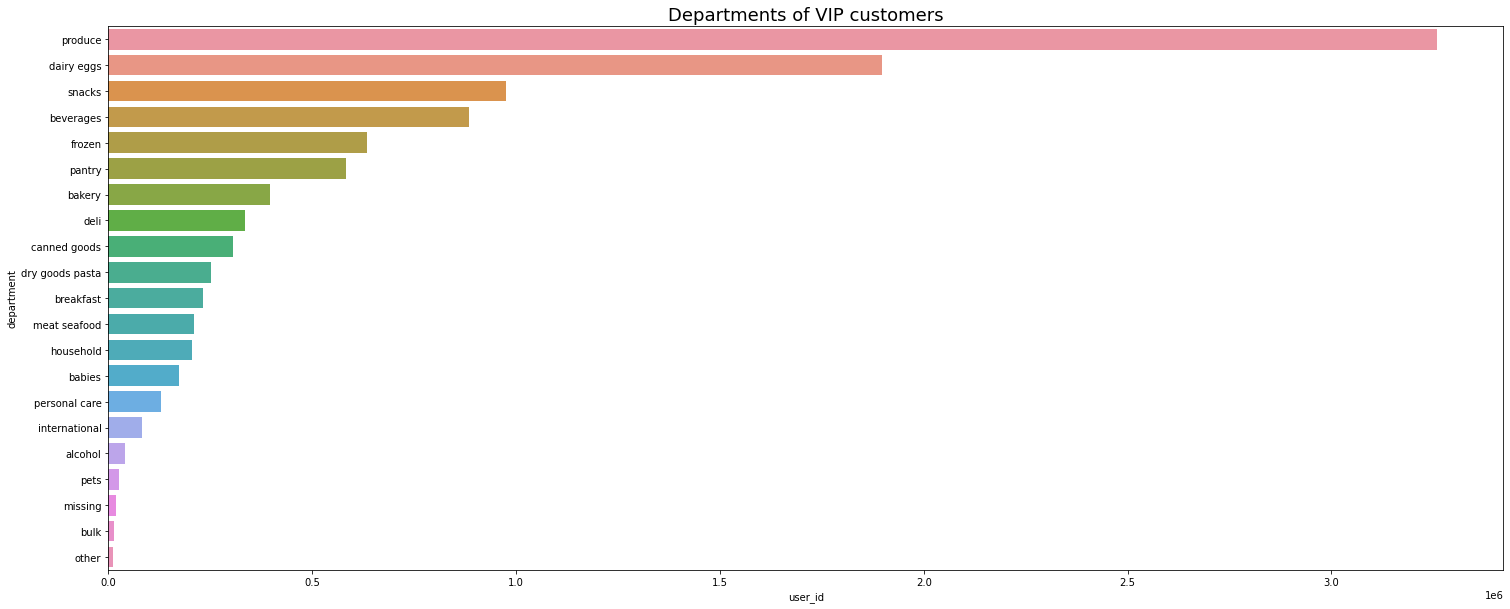

In [ ]:
plt.figure(figsize=(25, 10))
ax1 = sns.barplot(data=vip_department, x='user_id', y=vip_department.index)
# containers1 = ax1.containers[0]
# ax1.bar_label(containers1, labels=[f'{x:,.0f}' for x in containers1.datavalues], label_type='edge')
plt.title('Departments of VIP customers', fontsize=18)
plt.show()

In [ ]:
vip_df[vip_df['department']=='produce']

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
15,17,348137,16797,10,1,Strawberries,24,4,fresh fruits,produce,prior,39,5,16,11.0
34,17,603376,16797,5,1,Strawberries,24,4,fresh fruits,produce,prior,22,6,16,4.0
64,17,697863,9387,5,1,Granny Smith Apples,24,4,fresh fruits,produce,prior,29,6,14,5.0
84,17,805025,16797,8,1,Strawberries,24,4,fresh fruits,produce,prior,11,4,15,4.0
85,17,805025,9387,9,0,Granny Smith Apples,24,4,fresh fruits,produce,prior,11,4,15,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10661583,206208,3392839,13984,7,0,Organic Mint,16,4,fresh herbs,produce,prior,3,2,15,7.0
10661584,206208,3392839,20114,8,0,Jalapeno Peppers,83,4,fresh vegetables,produce,prior,3,2,15,7.0
10661585,206208,3392839,48364,9,0,Sweet Onion,83,4,fresh vegetables,produce,prior,3,2,15,7.0
10661586,206208,3392839,43122,10,0,Organic Bartlett Pear,24,4,fresh fruits,produce,prior,3,2,15,7.0


In [ ]:
len(vip_df)

10661601

In [ ]:
vip_department.describe()

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,4.982414e+05
std,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.571446e+05
min,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.086300e+04
25%,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,7.959800e+04
50%,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.270790e+05
75%,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.708190e+05
max,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.198034e+06


In [ ]:
vip_aisle = vip_df.groupby(['aisle']).count().sort_values(by='user_id', ascending=False)
vip_aisle

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
aisle,,,,,,,,,,,,,,
fresh fruits,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1306082
fresh vegetables,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1101570
packaged vegetables fruits,596012,596012,596012,596012,596012,596012,596012,596012,596012,596012,596012,596012,596012,584712
yogurt,526731,526731,526731,526731,526731,526731,526731,526731,526731,526731,526731,526731,526731,516438
milk,346909,346909,346909,346909,346909,346909,346909,346909,346909,346909,346909,346909,346909,340608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shave needs,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197,2168
facial care,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069,2023
beauty,1693,1693,1693,1693,1693,1693,1693,1693,1693,1693,1693,1693,1693,1648


In [ ]:
vip_aisle['user_id']

aisle
fresh fruits                  1330846
fresh vegetables              1122382
packaged vegetables fruits     596012
yogurt                         526731
milk                           346909
                               ...   
shave needs                      2197
facial care                      2069
beauty                           1693
eye ear care                     1606
frozen juice                     1155
Name: user_id, Length: 134, dtype: int64

In [ ]:
vip_aisle_top_10 = vip_aisle['user_id'].head(10)
vip_aisle_top_10 = vip_aisle_top_10.reset_index()

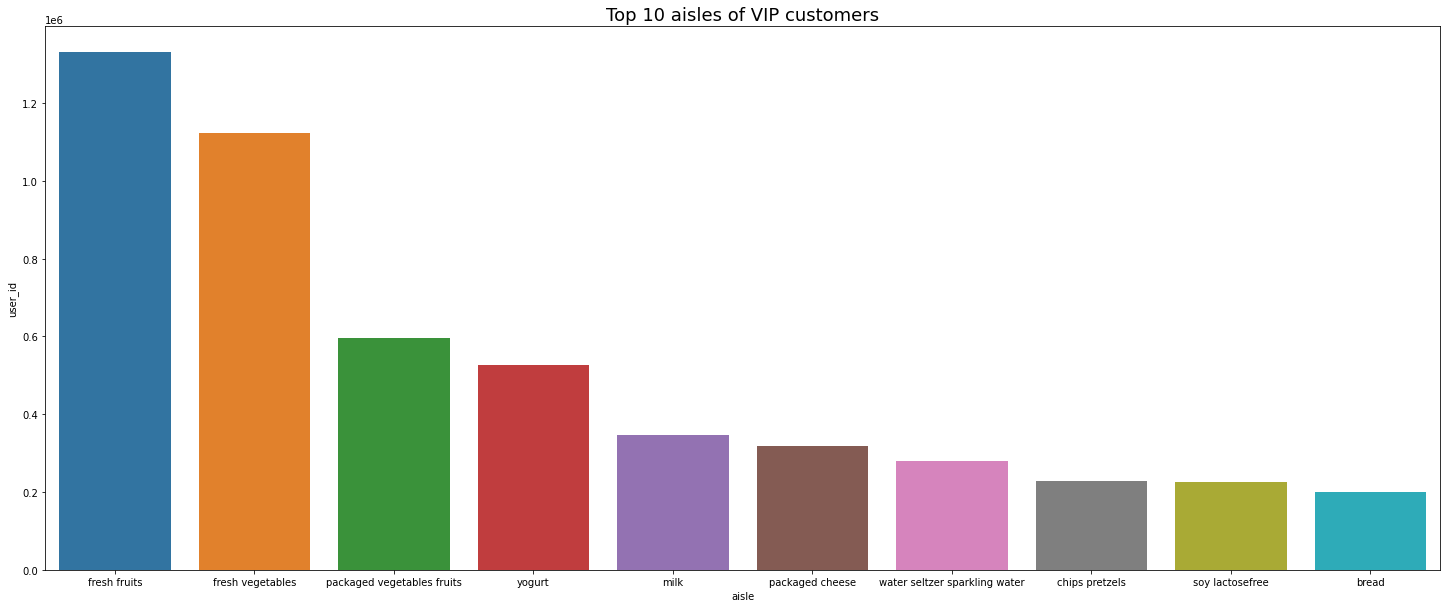

In [ ]:
plt.figure(figsize=(25, 10))
ax2 = sns.barplot(data=vip_aisle_top_10, x='aisle', y='user_id')
# containers2 = ax2.containers[-1]
# ax2.bar_label(containers2, labels=[f'{x:,.0f}' for x in containers2.datavalues], label_type='center')
plt.title('Top 10 aisles of VIP customers', fontsize=18)
plt.show()

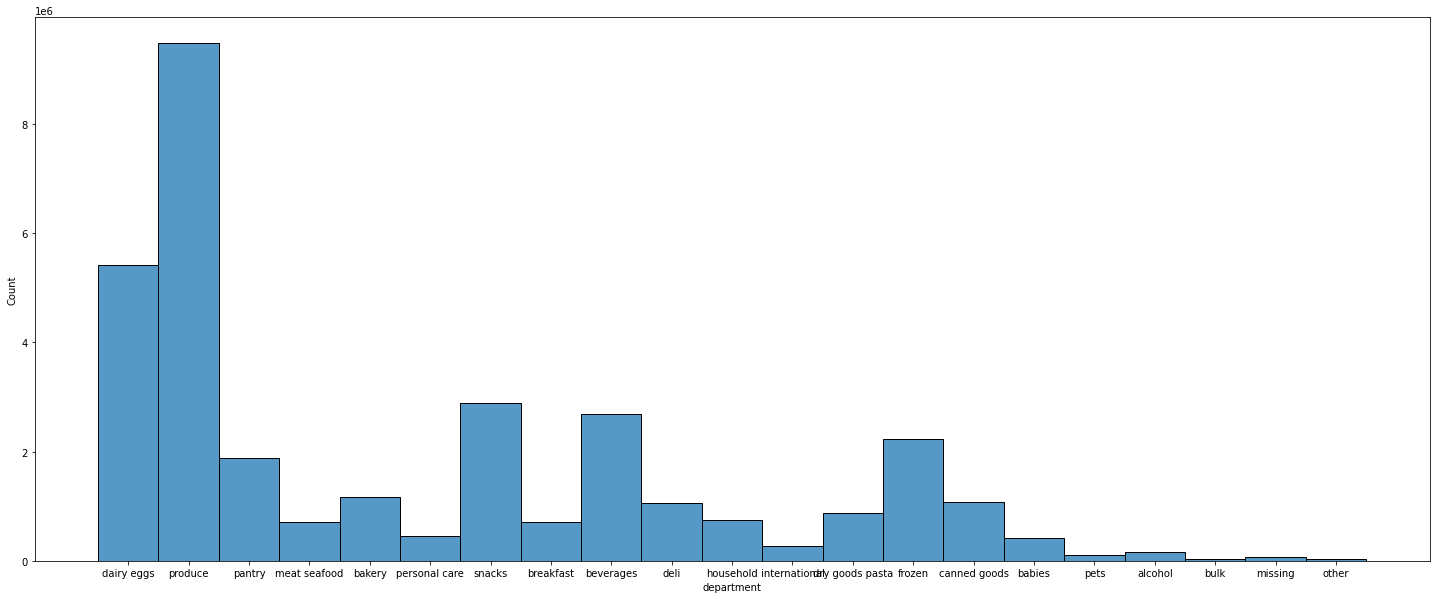

In [ ]:
plt.figure(figsize=(25, 10))
sns.histplot(data=temp3, x='department')

In [ ]:
order_number_normal2 = order_number_normal.reset_index()
order_number_normal2 = order_number_normal2['user_id']
order_number_normal2

0              1
1              2
2              3
3              4
4              5
           ...  
188302    206203
188303    206204
188304    206205
188305    206207
188306    206209
Name: user_id, Length: 188307, dtype: int64

In [ ]:
print(len(order_number_vip2))
print(len(order_number_normal2))

17902
188307


In [ ]:
normal_df = pd.merge(left=order_number_normal2, right=temp2, how='left')
normal_df

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,431534,196,1,1,Soda,77,7,soft drinks,beverages,prior,5,4,15,28.0
1,1,431534,12427,2,1,Original Beef Jerky,23,19,popcorn jerky,snacks,prior,5,4,15,28.0
2,1,431534,10258,3,1,Pistachios,117,19,nuts seeds dried fruit,snacks,prior,5,4,15,28.0
3,1,431534,25133,4,1,Organic String Cheese,21,16,packaged cheese,dairy eggs,prior,5,4,15,28.0
4,1,431534,10326,5,0,Organic Fuji Apples,24,4,fresh fruits,produce,prior,5,4,15,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21772883,206209,3154581,20842,11,0,Total 0% Greek Yogurt,120,16,yogurt,dairy eggs,prior,1,3,11,NaN
21772884,206209,3154581,23594,12,0,Medium Salsa,51,13,preserved dips spreads,pantry,prior,1,3,11,NaN
21772885,206209,3154581,25837,13,0,Mini Babybel Light Semisoft Edam Cheeses,21,16,packaged cheese,dairy eggs,prior,1,3,11,NaN
21772886,206209,3186442,14197,1,0,Tomato Paste,9,9,pasta sauce,dry goods pasta,prior,6,0,16,3.0


In [ ]:
normal_department = normal_df.groupby('user_id')

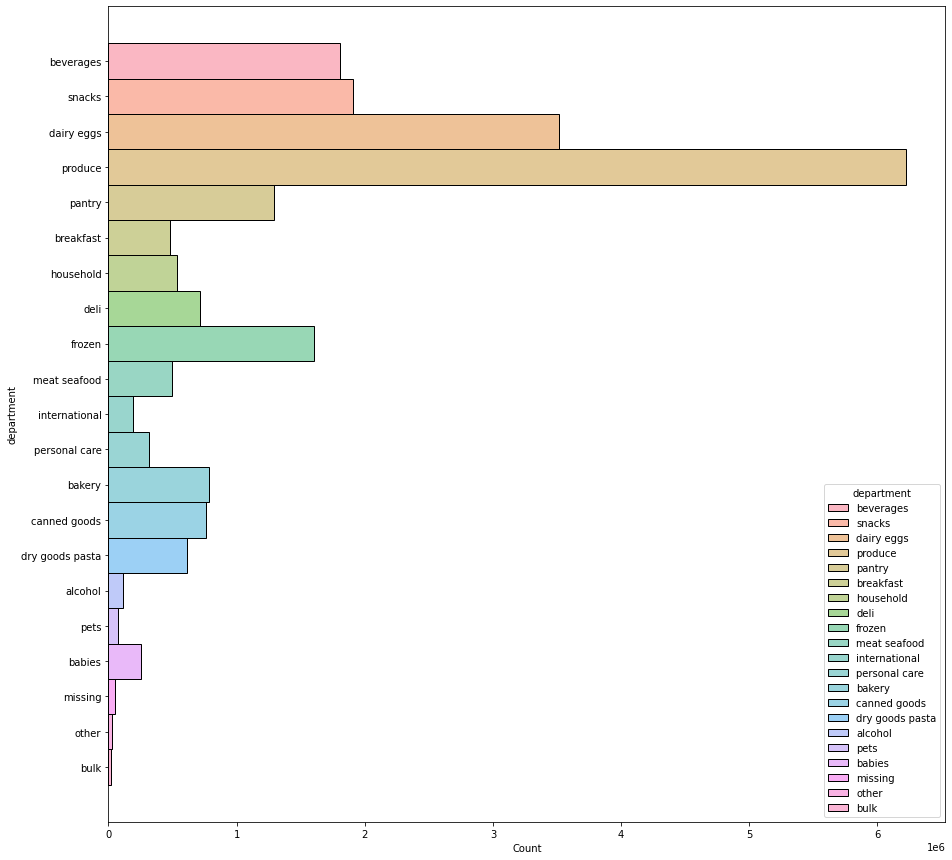

In [ ]:
plt.figure(figsize=(15,15))
sns.histplot(data=normal_df, y='department', hue='department')

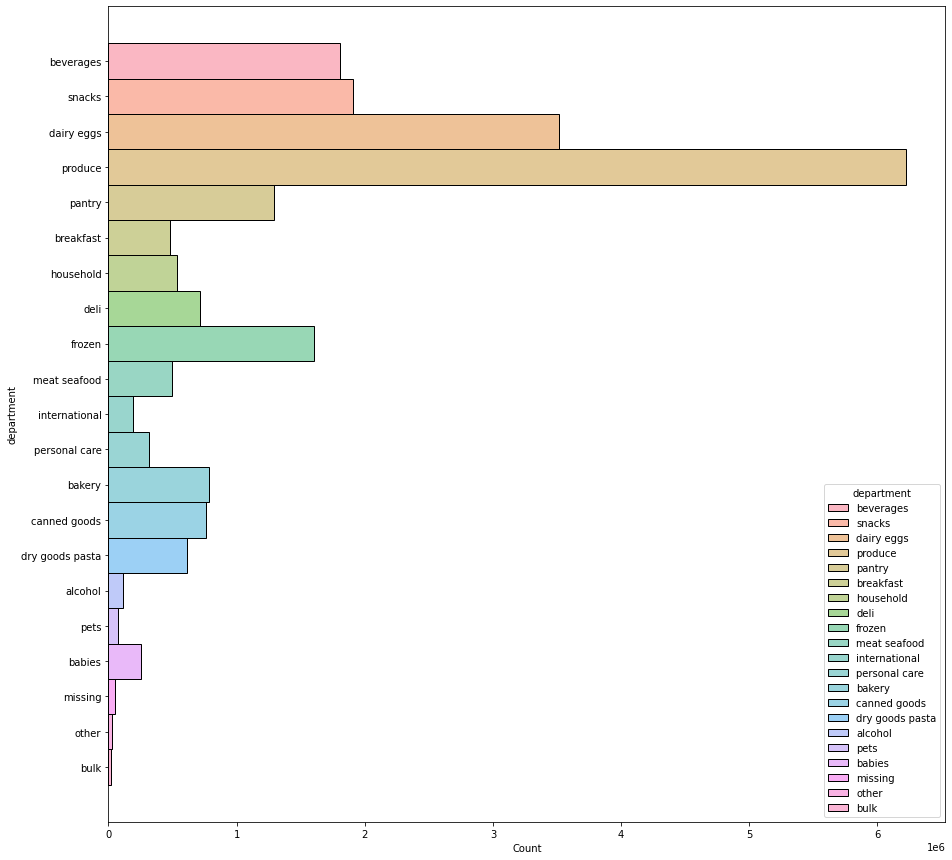

In [ ]:
plt.figure(figsize=(15,15))
sns.histplot(data=normal_df, y='department', hue='department')

In [ ]:
# temp_data = SalesLog['Payment'].groupby(SalesLog['Month']).sum()
# ax = plt.bar(temp_data.index, temp_data)
# plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
# plt.title('Payments by Month')
# plt.show()

In [ ]:
normal_df['reordered'].value_counts()

1    11262287
0    10510601
Name: reordered, dtype: int64

In [ ]:
normal_df.groupby('department').count()['reordered'].sort_values(ascending=False)

department
produce            6220382
dairy eggs         3516303
snacks             1911202
beverages          1806600
frozen             1602367
pantry             1293972
bakery              781654
canned goods        761730
deli                715504
dry goods pasta     614238
household           534540
meat seafood        497989
breakfast           477979
personal care       319160
babies              251224
international       187969
alcohol             113341
pets                 71109
missing              50169
other                25240
bulk                 20216
Name: reordered, dtype: int64

# add to cart 순위 / order number 순위와 비교해보자!

In [ ]:
temp2['add_to_cart_order'].max()    # 최대 145번째까지 있음
# 전체 고객데이터: 카트에 담긴 순서가, 많은 순서대로(대분류, 소분류)
# 카트에 담긴 순서 상위 1번째 ~ 10번째까지 담긴 상품들이 무엇인지 확인
cart_rank = temp2.sort_values(by = ['add_to_cart_order', 'department', 'aisle'])
cart_rank

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
112,13,17330,1,0,Light,27,5,beers coolers,alcohol,45082,prior,2,6,17,1.0
4256,446,28442,1,0,Coronita Beer Extra,27,5,beers coolers,alcohol,22274,prior,93,5,13,0.0
7424,770,45432,1,1,Brewmaster's Seasonal Sampler,27,5,beers coolers,alcohol,165709,prior,11,4,0,2.0
14322,1500,30736,1,1,Hard Cider Crisp Apple,27,5,beers coolers,alcohol,162652,prior,8,4,12,7.0
18788,1986,46088,1,0,Beer,27,5,beers coolers,alcohol,79780,prior,11,1,18,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14825326,1564244,46346,141,0,Sweet Potato Fries with Sea Salt,129,1,frozen appetizers sides,frozen,22906,prior,4,2,10,30.0
14825327,1564244,22594,142,0,Quattro Formaggi Four Cheeses Pizza,13,20,prepared meals,deli,22906,prior,4,2,10,30.0
14825328,1564244,21230,143,0,Organic Himalayan Pink Popcorn,23,19,popcorn jerky,snacks,22906,prior,4,2,10,30.0
14825329,1564244,43182,144,0,Almond Butter,3,19,energy granola bars,snacks,22906,prior,4,2,10,30.0


In [ ]:
cart_rank1 = cart_rank[cart_rank['add_to_cart_order']==1]
cart_rank1_dep = cart_rank1.groupby('department').count()
cart_rank1_dep.sort_values(by='order_id', ascending=False)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
department,,,,,,,,,,,,,,
produce,901240,901240,901240,901240,901240,901240,901240,901240,901240,901240,901240,901240,901240,845708
dairy eggs,650837,650837,650837,650837,650837,650837,650837,650837,650837,650837,650837,650837,650837,610783
beverages,409796,409796,409796,409796,409796,409796,409796,409796,409796,409796,409796,409796,409796,382831
snacks,225282,225282,225282,225282,225282,225282,225282,225282,225282,225282,225282,225282,225282,210625
frozen,182103,182103,182103,182103,182103,182103,182103,182103,182103,182103,182103,182103,182103,168972
pantry,154850,154850,154850,154850,154850,154850,154850,154850,154850,154850,154850,154850,154850,145610
bakery,117705,117705,117705,117705,117705,117705,117705,117705,117705,117705,117705,117705,117705,109959
deli,88297,88297,88297,88297,88297,88297,88297,88297,88297,88297,88297,88297,88297,82431
household,84805,84805,84805,84805,84805,84805,84805,84805,84805,84805,84805,84805,84805,78892


In [ ]:
cart_rank1_ai = cart_rank1.groupby('aisle').count()
cart_rank1_ai.sort_values(by='order_id', ascending=False)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
aisle,,,,,,,,,,,,,,
fresh fruits,445731,445731,445731,445731,445731,445731,445731,445731,445731,445731,445731,445731,445731,418611
fresh vegetables,237946,237946,237946,237946,237946,237946,237946,237946,237946,237946,237946,237946,237946,223127
milk,189435,189435,189435,189435,189435,189435,189435,189435,189435,189435,189435,189435,189435,178614
water seltzer sparkling water,160575,160575,160575,160575,160575,160575,160575,160575,160575,160575,160575,160575,160575,150280
packaged vegetables fruits,142252,142252,142252,142252,142252,142252,142252,142252,142252,142252,142252,142252,142252,133565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ice cream toppings,844,844,844,844,844,844,844,844,844,844,844,844,844,797
baby accessories,804,804,804,804,804,804,804,804,804,804,804,804,804,759
baby bath body care,794,794,794,794,794,794,794,794,794,794,794,794,794,751


우리 고객들은 카트에 담으면 그 물건들이 구매로 바로 이어지는 구매 패턴을 보이고 있다. <br>
(아마 식료품이라서? 사고자 하는 물건들을 바로 구입하는 것으로 보인다) <br>
카트상품과 실제 구매 상품이 별 차이가 나지 않기 때문에, 실제 구매가 높은 상품군들을 바탕으로 판매 전략을 짜는 것이 좋아보인다.

In [ ]:
# 전체 고객데이터: 구매 횟수가 많은 순서대로(대분류)
temp2.groupby('department').count()['order_number'].sort_values(ascending=False)

department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: order_number, dtype: int64

In [ ]:
# 전체 고객데이터: 구매 횟수가 많은 순서대로(소분류)
temp2.groupby('aisle').count()['order_number'].sort_values(ascending=False)

aisle
fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
yogurt                        1452343
packaged cheese                979763
                               ...   
eye ear care                     8974
baby bath body care              8581
baby accessories                 8160
beauty                           6168
frozen juice                     4853
Name: order_number, Length: 134, dtype: int64